In [ ]:
import matplotlib
import numpy as np
import math
import sys
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow

(600, 800, 3)


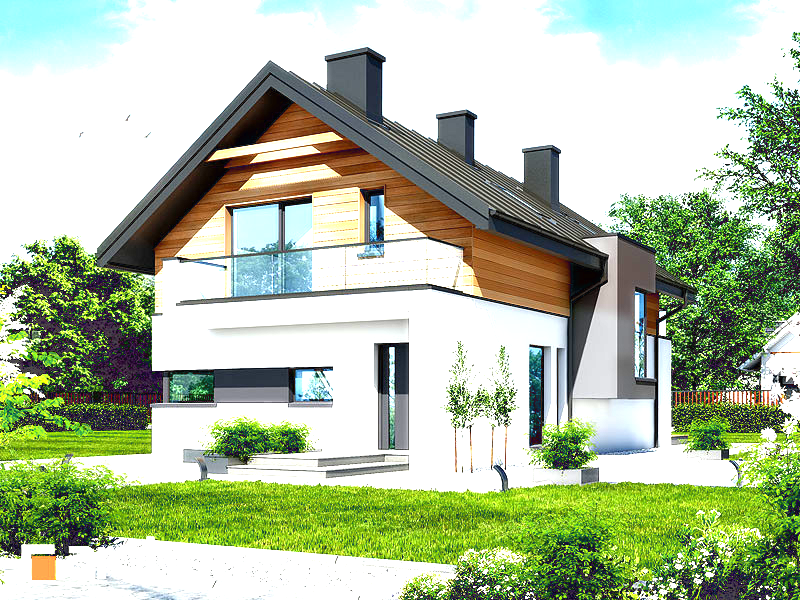

In [ ]:
img = cv.imread('/content/drive/MyDrive/input/kominy.jpg')
alpha = 2 # Contrast control
beta = -80 # Brightness control
img = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
print(img.shape)
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

(600, 800)


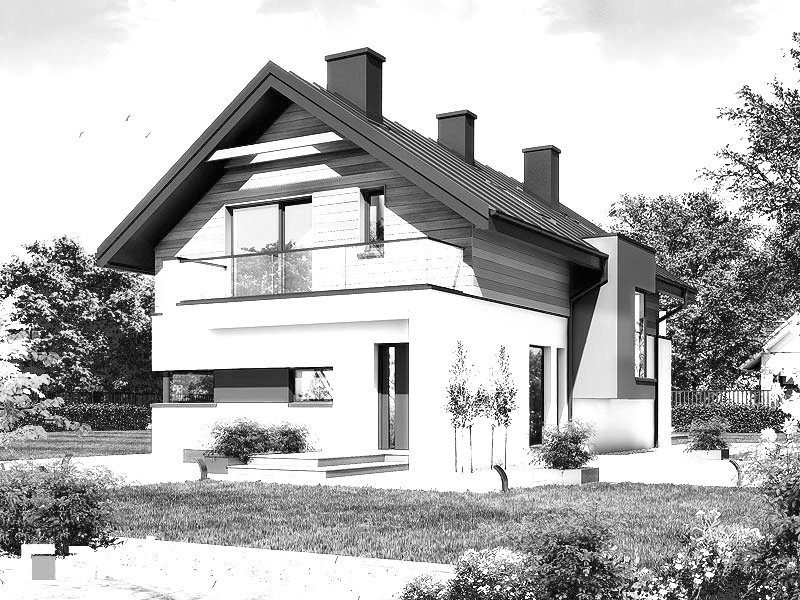

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(gray.shape)
cv2_imshow(gray)
cv.waitKey(0)
cv.destroyAllWindows()

(600, 800)


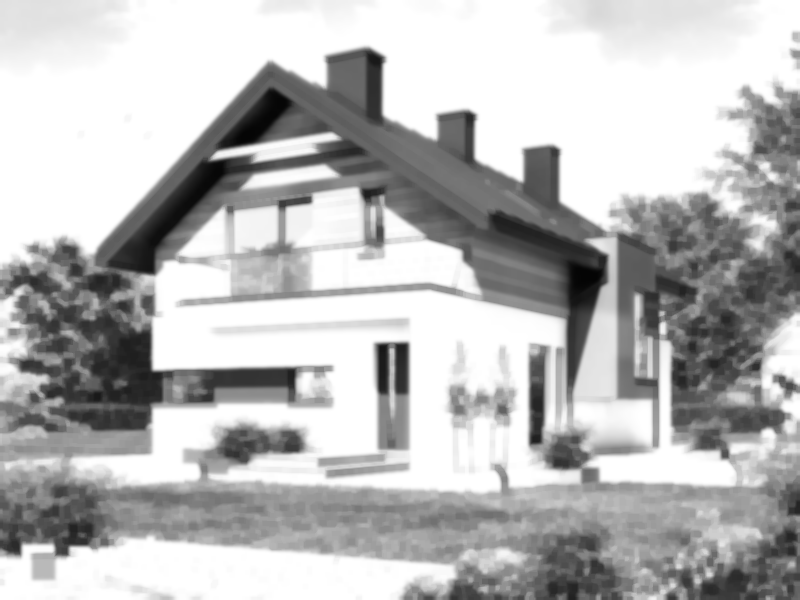

In [ ]:
blur = cv.GaussianBlur(gray, (9, 9), 0)
kernel = np.ones((3, 3), np.uint8)

blur = cv.dilate(blur, kernel, iterations = 2)
blur = cv.erode(blur, kernel, iterations = 1)

blur = cv.erode(blur, kernel, iterations = 2)
blur = cv.dilate(blur, kernel, iterations = 1)

print(blur.shape)
cv2_imshow(blur)
cv.waitKey(0)
cv.destroyAllWindows()

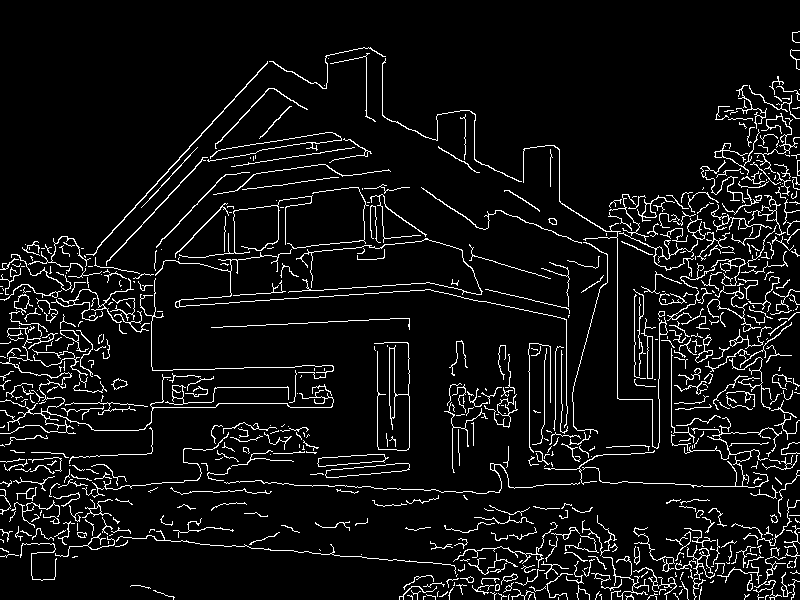

In [ ]:
gausEdges = cv.Canny(blur, 40, 100)
cv2_imshow(gausEdges)
cv.waitKey(0)
cv.destroyAllWindows()

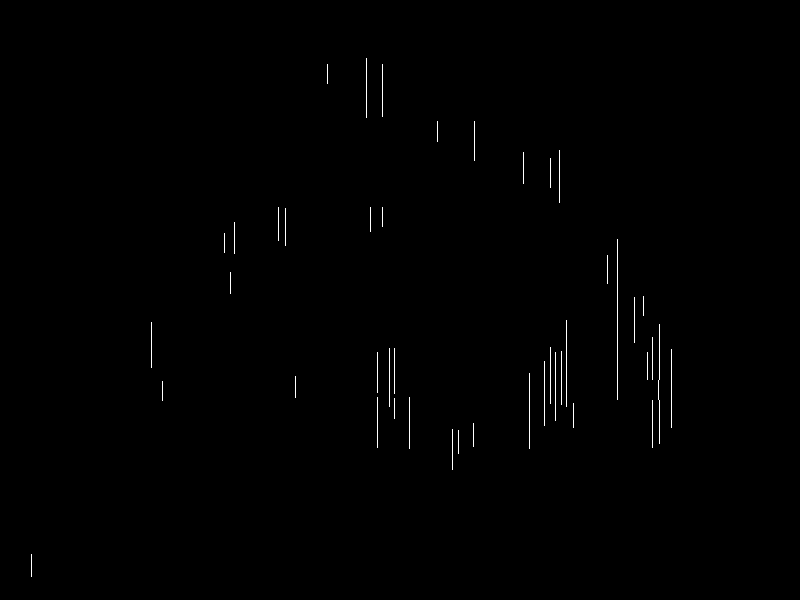

In [ ]:
# Specify size on vertical axis
vertical = np.copy(gausEdges)
rows = vertical.shape[0]
verticalsize = rows // 30

# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))

# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)

# Show extracted vertical lines
cv.imwrite("/content/drive/MyDrive/output/kominDetection.jpg", vertical)
cv2_imshow(vertical)
cv.waitKey(0)
cv.destroyAllWindows()

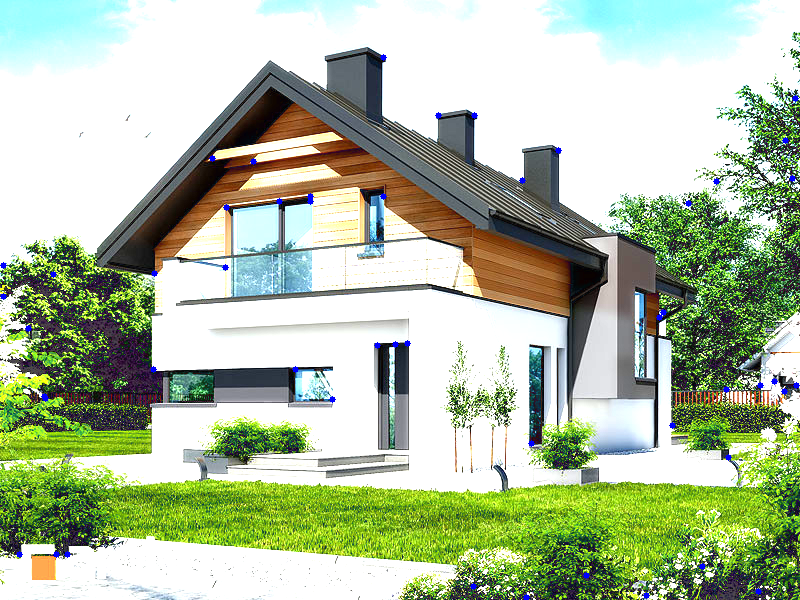

In [ ]:
corners = cv.goodFeaturesToTrack(blur,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)

cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()